<h2>Cross validation </h2>

the idea is to use not only a training and test set, but also a validation set. Using a test set to adapt the Model is kind of cheating, that means that the model will more or less overfit the test set whereas it should not.
For each iteration we can also split the validation set (k-fold cross validation set - or even better Nested K-fold validation set) .If 5 iterations, validation set is 1/5th of the total training set.
Validation Set allow to evaluate performance of the model.


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

# Warning, the dataset is sorted, so, plitting it would result in a bad range of values, especially targets
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))

X, y = X[permutation], y[permutation]

k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []

for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True

    # store the mask for visualization
    masks.append(test_mask)
    
    # create training and test set using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    
    # fit the classifier
    classifier.fit(X_train, y_train)
    
    # Compute the score and record it
    scores.append(classifier.score(X_test, y_test))
    

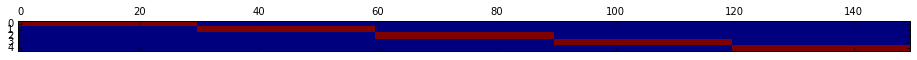

[0.96666666666666667, 0.90000000000000002, 1.0, 1.0, 0.93333333333333335]
0.96


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks)
plt.show()

print(scores)
print(np.mean(scores))

#we clearly see that depending on the fold, we have 10% difference, so using each of them makes sense

In [15]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))
#cv arguments changes the number of folds
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)
print(np.mean(scores))
#NB : the results are slightly different (and better) as the manual version above, because the sklearn algo do stratification via stratifiedKFold (to keep equal proportions)



[ 0.98039216  0.98039216  0.95833333]
0.973039215686
[ 1.          0.93333333  1.          1.          0.93333333]
0.973333333333


In [24]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

cv = StratifiedKFold(iris.target, n_folds=5)
print('train', train)
print('test', test)
print(cv)
for train, test in cv:
    print(test)

train [ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]
test [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139]
sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2], n_folds=5, shuffle=Fals

In [25]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

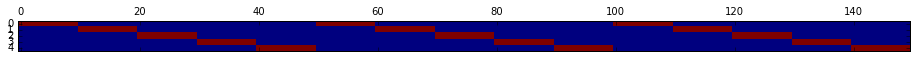

In [26]:
plot_cv(StratifiedKFold(iris.target, n_folds=5), len(iris.target))

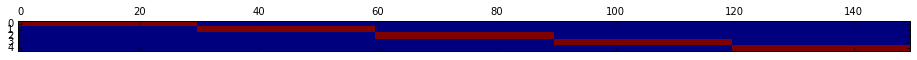

In [30]:
plot_cv(KFold(len(iris.target), n_folds=5), len(iris.target ))

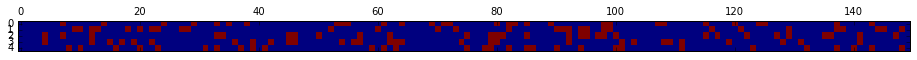

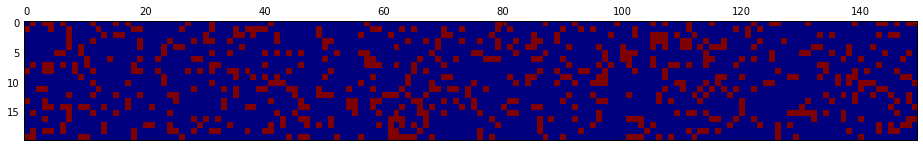

In [34]:
plot_cv(ShuffleSplit(len(iris.target), n_iter=5, test_size=.2), len(iris.target))

plot_cv(ShuffleSplit(len(iris.target), n_iter=20, test_size=.2), len(iris.target))

In [39]:
#each cv can be used with cross_val_score
cv = ShuffleSplit(len(iris.target), n_iter=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([ 0.93333333,  1.        ,  0.93333333,  0.93333333,  0.96666667])

In [42]:
cv = KFold(n=len(iris.target), n_folds=3)
cross_val_score(classifier, iris.data, iris.target, cv=cv)

array([ 0.,  0.,  0.])